In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt

In [2]:
df = pd.read_csv("Datasets\FRED-NROUST.csv")

In [4]:
df

,Date,Value
0,01-01-1949,5.255053
1,01-04-1949,5.261516
2,01-07-1949,5.268013
3,01-10-1949,5.274564
4,01-01-1950,5.281182
...,...,...
327,01-10-2030,4.294982
328,01-01-2031,4.289282
329,01-04-2031,4.283630
330,01-07-2031,4.278029


In [6]:
y = df["Value"]

y_train = df["Value"][:-8]
y_test = df["Value"][-8:]

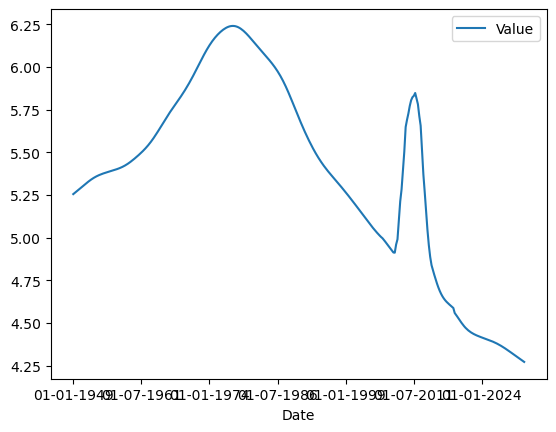

In [7]:
df.plot.line(x = "Date" , y = "Value")
plt.show()